In this notebook we analyse the names given to babies in the US over time. All data is in a folder called **names**.
For each year (starting in 1880) we list names that have been used at least $5$times. 

In [47]:
def f(year):
    frame = pd.read_csv("names/yob{0}.txt".format(year), header=None).rename(columns={0: "Name", 1: "Gender", 2: "n"})
    frame["year"] = year
    return frame

X = pd.concat({year: f(year) for year in range(1880,2016)}).reset_index(drop=True)

# extract the last letter of the first name
X["last"] = X["Name"].apply(lambda x: x[-1])

# print the head of the DataFrame
X.head(10)
X.shape

(1858689, 5)

In [46]:
X.groupby(["Name","Gender"])["n"].sum().sort_values(ascending=False)

Name           Gender
James          M         5120990
John           M         5095674
Robert         M         4803068
Michael        M         4323928
Mary           F         4118058
William        M         4071645
David          M         3589754
Joseph         M         2581785
Richard        M         2558165
Charles        M         2371621
Thomas         M         2290364
Christopher    M         2004667
Daniel         M         1882435
Elizabeth      F         1610948
Patricia       F         1570954
Matthew        M         1566027
Jennifer       F         1464067
George         M         1457646
Linda          F         1451331
Barbara        F         1433339
Anthony        M         1413852
Donald         M         1409708
Paul           M         1383157
Mark           M         1345859
Edward         M         1283884
Steven         M         1275903
Kenneth        M         1268921
Andrew         M         1266115
Margaret       F         1242141
Joshua         M     

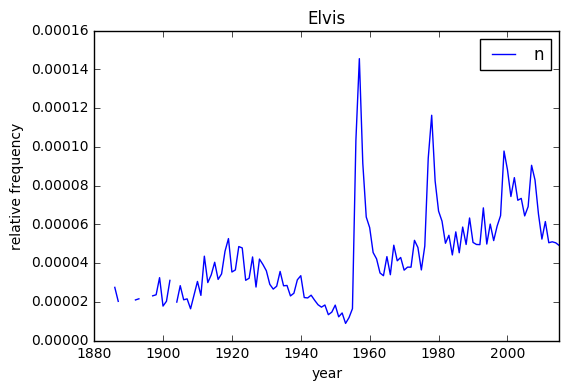

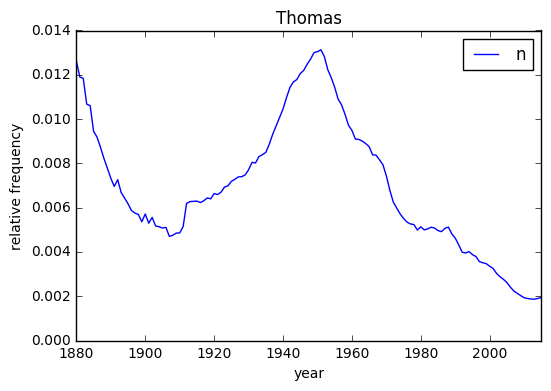

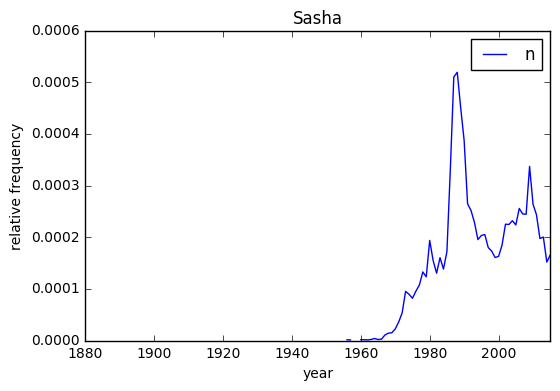

,n
year,
1880,NaN
1881,NaN
1882,NaN
1883,NaN
1884,NaN
1885,NaN
1886,NaN
1887,NaN
1888,NaN


In [32]:
import matplotlib.pyplot as plt

def name_plot(name):
    A=X[X["Name"] == name].groupby("year").sum()
    B=X.groupby("year").sum()
    ratio = A/B
    ratio.plot()
    plt.title(name)
    plt.xlabel('year')
    plt.ylabel('relative frequency')
    plt.show()
    return ratio

name_plot(name="Elvis")
name_plot(name="Thomas")
name_plot(name="Sasha")

In [19]:
A=X.groupby(["Gender","last"])["n"].sum()
A

Gender  last
F       a       57416684
        b          16726
        c          28969
        d         750751
        e       37093632
        f           2178
        g          35940
        h        8035778
        i        3810260
        j           3255
        k          40420
        l        5796244
        m         426110
        n       19906595
        o         407730
        p           4431
        q            610
        r        3923696
        s        3690539
        t        2481962
        u          87198
        v           4245
        w          50517
        x          34636
        y       24671568
        z         140907
M       a        1901692
        b        1408669
        c        1650207
        d       16368949
        e       14603942
        f         206956
        g         594802
        h        6828136
        i         849164
        j          32363
        k        5368359
        l       14936697
        m        5789994
        n   

In [20]:
ratio=A.ix["M"]/(A.ix["M"]+A.ix["F"])
ratio.plot()
ratio

last
a    0.032059
b    0.988266
c    0.982748
d    0.956147
e    0.282488
f    0.989586
g    0.943019
h    0.459377
i    0.182247
j    0.908614
k    0.992527
l    0.720433
m    0.931451
n    0.652697
o    0.911724
p    0.993546
q    0.955196
r    0.720349
s    0.823351
t    0.791788
u    0.485056
v    0.920886
w    0.983671
x    0.947364
y    0.428141
z    0.453243
Name: n, dtype: float64

In [21]:
X[X["Name"]=="Horst"]

,,Name,Gender,n,last,year
1934,8440,Horst,M,6,t,1934
1938,8751,Horst,M,5,t,1938
1940,8701,Horst,M,5,t,1940
1953,10540,Horst,M,5,t,1953
1958,11208,Horst,M,5,t,1958
1961,11845,Horst,M,5,t,1961
1962,11019,Horst,M,7,t,1962
1963,11461,Horst,M,6,t,1963
1964,12088,Horst,M,5,t,1964
1965,10910,Horst,M,7,t,1965


In [22]:
X[(X["last"]=="a") & (X["Gender"]=="F")].groupby("Name")["n"].sum().sort_values()

Name
Lasaunda           5
Lapatra            5
Laoma              5
Lanyra             5
Lantanya           5
Lannetta           5
Laniyia            5
Laneva             5
Lanesa             5
Lanena             5
Aylanna            5
Ayleena            5
Lanekia            5
Aylianna           5
Lanayshia          5
Lanayja            5
Lanajia            5
Lanaija            5
Lakyndra           5
Lalainia           5
Lalenia            5
Laleta             5
Ayoola             5
Lalicia            5
Laporchea          5
Ayondela           5
Lamea              5
Lamera             5
Lameya             5
Lamirra            5
              ...   
Theresa       402880
Gloria        410149
Teresa        412480
Sara          419025
Andrea        426328
Julia         449496
Victoria      471906
Christina     474091
Maria         537525
Martha        547560
Debra         550226
Samantha      561314
Pamela        593837
Brenda        606183
Emma          614505
Virginia      647156
Angela  